<a href="https://colab.research.google.com/github/Eldave93/Seizure-Detection-Tutorials/blob/master/08.%20Multilayer%20Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08. Multilayer Perceptrons

by [David Luke Elliott](https://www.lancaster.ac.uk/psychology/about-us/people/david-elliott)
/ [GitHub](https://github.com/Eldave93) 


So far we have been focusing on what could be termed "*shallow*" machine-learning approaches, and so now we will focus on "*deep*" learning. Deep learning is a set of algorithms developed to train many layered artificial neural networks efficiently<sup>2</sup>. Multilayer neural networks are harder to train than the previous simpler algorithms (e.g. logistic regression or support vector machines) as there are typically thousands or even billions of weights that need to be optimized. This means steps need to be taken to ensure the optimization algorithm doesnt become trapped in local minima<sup>2</sup>. 

The first artificial neural network (ANN) architecture was presented back in 1943 (REF), in a paper describing a computational model of biological neurons. Biological neurons are comprised of a cell body, with a nucleus, with extended branches called dendrites. A long extension called the axon runs from the cell body and has smaller branches at the extremity called telodendria; which each having synaptic terminals. Neurons recive input from electrical signals via synapses, with it firing its own signal if it recieves enough signals from other neurons (action potential). Billions of neurons are arranged in networks to compute conplex computations. Although modern ANN's have moved away from their biological inspiration, the architecture of biological neural networks is still an active area of research<sup>1</sup>. This notebook begins to look at how we can apply artifical networks to classify the outputs of millions/billions of neurons when firing normally (interictal), or synchronously to cause seizures (ictal).

The success of modern deep learning methods rests upon the availability of lots of data and GPU hours on modern GPUs to compute matrix-vector computations<sup>3</sup>. Deep learning has accelerated rapidly within the last few years, with one of the main reasons being the "*democratization*" of the toolsets used in the field. As can be seen in the table below, starting from 2010 multiple libraries were released for deep learning, with the most popular arguably Theano and TensorFlow. Within the more recent years libraries have become more user-friendly, with Keras quickly becoming one of the dominant go-to deep-learning solutions commonly used by new startups, graduate students, and researchers (such as me)<sup>4</sup>.

Open Source Deep Learning Libraries<sup>1</sup>:

| Library        | API                  | Platforms                           | Year |
|----------------|----------------------|-------------------------------------|------|
| Caffe          | Python, C++, Matlab  | Linux, macOS, Windows               | 2013 |
| Deeplearning4j | Java, Scala, Clojure | Linux, macOS, Windows, Android      | 2014 |
| H20            | Python, R            | Linux, macOS, Windows               | 2014 |
| MXNet          | Python, C++, others  | Linux, macOS, Windows, iOS, Android | 2015 |
| TensorFlow     | Python, C++          | Linux, macOS, Windows, iOS, Android | 2015 |
| Theano         | Python               | Linux, macOS, iOS                   | 2010 |
| Torch          | C++, Lua             | Linux, macOS, iOS, Android          | 2002 |

![alt text](https://dpzbhybb2pdcj.cloudfront.net/chollet/Figures/03fig02_alt.jpg)

So why start to think about deep learning beyond the previously discussed "*shallow*" machine-learning approaches? Well firstly they can reduce the need for data preprocessing and feature engineering and can provide simple trainable models built using only five or six different operations. Secondly they are scalable, as they can be easily parallelized on GPUs or TPUs and can be trained by iterating over small batches of data. Thirdly they are reusabile, so they can be trained on additional data without starting from scratch, making them viable for continuous online learning. Furthermore they can be repurposed by taking early already trained layers and applying them to another problem in a similar domain space<sup>4</sup>.

**NOTES**
- It’s recommended that you run deep-learning code on a modern NVIDIA GPU because some networks (e.g. convolutional networks and recurrent neural networks) are very slow on CPUs.

**TODO**
- A lot of this work focuses on examples given in the excellent book by Géron (go out and buy it to show support!). I need to update this now to include more of the reading and writing I have done since I wrote this tutorial.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. Raschka, S. (2016). Python Machine Learning (First). Packt.
3. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".
4. Chollet, F. (2017). Deep learning with python. Manning Publications.
5. Subasi, A. (2007). Application of adaptive neuro-fuzzy inference system for epileptic seizure detection using wavelet feature extraction. Computers in Biology and Medicine, 37(2), 227–244. https://doi.org/10.1016/j.compbiomed.2005.12.003

In [1]:
#GPU count and name
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-9f78268c-06ad-c3da-a65f-62000da5bd4b)


In [2]:
#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

Sat Mar  7 19:22:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
!pip install tensorflow-gpu==2.1
!pip install hpbandster

In [5]:
import tensorflow
tensorflow.__version__

'2.1.0'

# Data Preparation

First lets start by getting our workspace ready and then loading in the data.

In [0]:
from google.colab import drive
import sys
import os

CLASS_BACK = '.'

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Copy Locally

If you have been using Google Colab and data from a mounted google drive, then now is the best time to copy your data to the VM local filesystem to improve training speeds. It means the start of this tutorial will slower as it download BUT training is much faster than if left on google drive<sup>1</sup>

In this tutorial we are going to stick with using features familiar to us in previous notebooks. Although deep learning often doesnt require as much data preparation, in its application to EEG data it still occours quite frequently (e.g. REF's).

We are moving on to use the TUH dataset now, as deep learning models are much better at handling large amounts of data comparitive to the classical models. Still we are only going to work with a small part of this dataset (most of the patients with absense seizures), so training does not take a long time when going through the examples.

**NOTES**
- I have a larger dataset of Generalised Epilepsies prepared here (INSERT LINK)

---
1. https://dev.to/kriyeng/8-tips-for-google-colab-notebooks-to-take-advantage-of-their-free-of-charge-12gb-ram-gpu-be4

In [0]:
import os
import gdown
FILE_PATH = 'TUH_feat.hdf5'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=1-VCuFpjiVEwtgE31te0Z7zdzEKs5HeLU', 
                './'+FILE_PATH, quiet=False)

## Split Data
We can see that the data is saved in separate participant ID's

In [8]:
import h5py

f = h5py.File(FILE_PATH, 'r')
key_list = list(f.keys())
key_list

['00000675',
 '00001113',
 '00001413',
 '00001984',
 '00002448',
 '00002657',
 '00003053',
 '00003281',
 '00003306',
 '00003635']

Lets split up our dataset into training and test sets

In [9]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 0

train_list, test_list = train_test_split(key_list, test_size=TEST_SIZE, 
                                         random_state=RANDOM_STATE)
data_lists = {'train': train_list, 
              'test': test_list}

print(color.BOLD+color.UNDERLINE+'Training List'+color.END)
display(train_list)
print()
print(color.BOLD+color.UNDERLINE+'Test List'+color.END)
display(test_list)

Training List


['00002448',
 '00003635',
 '00001113',
 '00003053',
 '00003281',
 '00001984',
 '00000675',
 '00002657']


Test List


['00001413', '00003306']

## Load Data

We are going to use the above lists to make our datasets for this tutorial

**NOTE**
- I have already scaled this data with a standard scaler on each record

In [10]:
import pandas as pd

def make_data(data_lists):
  data_dict = {}
  for data_type in data_lists:
    key_list = data_lists[data_type]
    for i, part_id in enumerate(key_list):
      if i == 0:
        data = pd.read_hdf(FILE_PATH, part_id)
      else:
        data = pd.concat([data, pd.read_hdf(FILE_PATH, part_id)])
    data_dict[data_type] = data
  return data_dict
    
data_dict = make_data(data_lists)

X_train = data_dict['train'].values
X_test = data_dict['test'].values
y_train = data_dict['train'].index.values
y_test = data_dict['test'].index.values
feat_names = list(data_dict['train'].columns)

display(X_train.shape)
display(X_test.shape)

(15566, 1298)

(5050, 1298)

Change the codes to integers 1, ..., c+1

In [11]:
import numpy as np
from sklearn import preprocessing
display(np.unique(y_train))

# lets change integers
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

display(np.unique(y_train))

array([ 6, 12])

array([0, 1])

# Perceptrons
The Perceptron is one of the simplest ANN architectures based on artifical neurons called a threshold logic unit (TLU)/ linear threshold unit (LTU). The inputs and outputs are numerical, with each input associated with a weight. The TLU computes a weighted sum of the inputs, applies a step function, and outputs the result. The most common step function is the Heaviside step function<sup>1</sup>.

A single TLU can be used for simple linear binary classification by computing a linear combination of inputs, and if these exceed a threshold, outputs a positive or negative class. Training just means finding the right values of the weights<sup>1</sup>.

A Perceptron is a single layer of TLUs with each neuron connected to all the inputs. Special pass through neurons called input neurons, which output whatever input is fed, tend to be first. There is also an extra bias feature commonly added (Bias Neuron), which just outputs 1 all the time<sup>1</sup>.

"*Cells that fire together, wire together*" Siegrid Löwel

This quote is esentially Hebbs rule that the connection weight between two neurons is increased when they have the same output<sup>1</sup>. Perceptrons are trained to have a variant on this rule that takes into account the network error, not reinforcing connections that lead to the wrong output. One training instance is fed at a time, with each making a prediction. For each output neuron that produced a wrong prediction, it reinfroces the connection weights that would have contributed to the correct prediction<sup>1</sup>.

Lets have a quick look at how we can make one in sklearn.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

In [12]:
%%time
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

per_clf = Perceptron(max_iter=100, #tol=-np.infty, 
                     random_state=RANDOM_STATE)

scores = cross_val_score(estimator=per_clf, 
                         X=X_train, 
                         y=y_train, 
                         scoring = 'accuracy',
                         cv=5,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.98715478 0.98329586 0.96562801 0.97494378 0.97012528]
CV accuracy: 0.976 +/- 0.008
CPU times: user 109 ms, sys: 162 ms, total: 271 ms
Wall time: 2.94 s


Perceptrons have a few limitations. They are similar to Logistic Regression classifiers, but Perceptrons do not output a class probability. They only make predictions based on a hard threshold. Also, as was shown by Minsky and Papert (REF), they are incapable of solving some trivial problems. However some of these limitations can be solved by a Multi-Layer Perceptron<sup>2</sup>.

Multi-Layer Perceptrons are comprised of a three general layers:

1. A passthrough input layer
2. One or more layers of TLUs - hidden layers
3. A final layer of TLUs - output layer

Every layer has a bias neuron and is fully connected to the next layer. When an ANN has two or more hidden layers it is called a deep neural network (DNN). 

For each training instance the algorithm... 
- feeds it to the network
- computes the output of every neuron in each layer
- measures the output error
- computes how much each neuron in the last hidden layer contributed to each output neurons error
    - this is repeated for each previous hidden later until the algorithm reaches the input layer. This is known as backpropagation (or Gradient Descent using reverse mode autodiff)<sup>3</sup>.
- the connection weights are tweeked to reduce error

For this to work the step function has to be changed to a logistic function to allow Gradient Descent to make progress each step. As well as the logistic function (output range 0 to 1), back propogation may be used with other activation functions such as the hyperbolic tangent function (tanh), whos output ranges from -1 to 1 helping make each layers output more normalized, and the ReLU function, which is continuous and has an abrupt change in slope<sup>2</sup>.

When the output classes are exclusive, the output later is modified by a shared softmax function, where the output of each neuron corresponds to the estimated probability of the coressponding class<sup>2</sup>.

As the signal flows from inputs to outputs, this is an example of a feedforward neural network (FNN).

---
1. Marvin, M., & Seymour, P. (1969). Perceptrons.
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
3. Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1985). Learning internal representations by error propagation (No. ICS-8506). California Univ San Diego La Jolla Inst for Cognitive Science.

In [13]:
%%time
from sklearn.neural_network import MLPClassifier

per_clf = MLPClassifier(
    hidden_layer_sizes = (100,),
    max_iter=100,
    early_stopping = True, 
    random_state=RANDOM_STATE)

scores = cross_val_score(estimator=per_clf, 
                         X=X_train, 
                         y=y_train, 
                         scoring = 'accuracy',
                         cv=5,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CV accuracy scores: [0.9894027  0.99004176 0.98490202 0.98875683 0.97558625]
CV accuracy: 0.986 +/- 0.005
CPU times: user 71.2 ms, sys: 79.5 ms, total: 151 ms
Wall time: 21.7 s


# Tensorflow (Keras API)

TensorFlow is a multiplatform and scalable programming interface for running large-scale machine learning algorithms. It was developed by Google Brain team and was released in November 2015 under an open source license, so now involves many contributions from the open source community. TensorFlow allows execution on CPUs, GPUs, and TPUs; with each in turn having improved performance capabilities<sup>1</sup>.
    
TensorFlow is built around a computation graph comprised of nodes. Each node represents an operation which may have input or outputs. The values at the edges of the graph are called tensors<sup>1</sup>. Tensors are defined by their 'rank':
- rank-0: scalar
    - A tensor that contains a number is a scalar. In Numpy this is a float32 or float64.
- rank-1: vector
    - An array of numbers along one axis is a vector
- rank-2: matrix
    - An array of vectors is a matrix, which has two axes (rows and columns)
- rank-3: 3 dimensional matrix
- ect.
    
So really a tensor is a container for data with an arbitrary number of dimensions. 
    
Tensorflow can break its graph up into chunks run in parallel.

In Python there are multipule API's to construct neural networks and it comes with TensorBoard which means you can browse the computational graph<sup>2</sup>.

---
1. Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
3. Chollet, F. (2017). Deep learning with python. Manning Publications.

**Keras API**

Let start to dig into how to start to build a model with the Keras API; the main API since the update to TensorFlow 2.0.

Keras is a model-level library, providing high-level building blocks for developing deep-learning models<sup>4</sup>. Keras is modular and has several different backend engines that can be used:
- TensorFlow (Recommended)
- Theano
- Microsoft Cognitive Toolkit 

TensorFlow has its own Keras implementation called tf.keras, which works well with TensorFlow specific features such as TensorFlow’s Data API.

Lets use tf.keras to start to build a similar model structure as before. To do this we need to define the *layers* of the model. A layer processes data by taking one or more tensors as input and outputs one or more tensors. Some layers are stateless, most have a state in the form of the layer’s weights held in one or several tensors<sup>4</sup>.

Many different layers and architectures exist. Some of the layers you can include in a deep learning model include:

- Fully Connected (Dense) Layers

    - A fully connected layer is a set of linear functions of all of the input features used for every independent output. These dense connections allow global pattern detections<sup>2</sup>.
    - Usually used with simple vector data, stored in 2D tensors of shape (samples, features)<sup>4</sup>.
    
    
- Convolutional Layers

    - Convolutional layers use a subset of inputs for each output. The transformation creates outputs using a few features at a time, meaning they tend to be better for identifying local patterns instead of global ones<sup>2</sup>. 
    - As the filters move across the inputs in strides, they are commonly used for image recognition, voice recognition or natural language processing<sup>3</sup>. Image data, stored in 4D tensors, is usually processed by 2D convolution layers<sup>4</sup>.
    
    
- Response Normalization Layers

    - These layers divide the output by a function of the collective total responce, creating competition for the outputs as it is measured against its neighbours<sup>2</sup>.


- Pooling Layers
    
    - Pooling layers combine multipule inputs into a single output using methods such as averaging, summing, or taking the maximum value. This reduces outputs in intermediate layers to reduce the probability of overfitting the network to the training data<sup>2</sup>.
    
    
- Recurrent Layers

    - Recurrent layers have forward and backward connections so that activations can flow back and forth. Neurons in these layers have inputs at time X<sub>(t)</sub> and its own outputs from time X<sub>(t-1)</sub>. This means that the neurons have two sets of weights, one for inputs and one for the outputs of the previous time step<sup>3</sup>. As they have inputs from the previous time steps known as *memory cells*.
    - Usually used with sequence data, stored in 3D tensors of shape (samples, timesteps, features)<sup>4</sup>.
    

Building deep-learning models means creating a pipeline to transform the data. When using Keras, layers you add to your models are dynamically built to match the shape of the incoming layer. Commonly layers are linearly stacked to map a single input to a single output, but other architectures exist (e.g. Two-branch networks, Multihead networks, Inception blocks)<sup>4</sup>. By stacking multipule layers of different types you can create:

- Multilayer Perceptrons
    - fully connected layers
- Convolutional neural networks
    - fully connected, convolutional, and pooling layers.
- Recurrent neural network 
    - recurrent, and fully connected layers.
    
We are going to focus on Multilayer Perceptrons in this tutorial, which is just a sequential stack of Dense layers. We need to specify how many layers and how many hidden units in each layer there are in the model. Having more hidden units for the learning of more-complex representations, but is more computationally expensive and may lead to the model learning unwanted patterns which may not generalise to data that has not been trained on<sup>4</sup>.

**NOTES**
- [This](http://playground.tensorflow.org) is a great visualisation
- Examples of other APIs will be in an extra tutorial I will release

---
1. Raschka, S., & Mirjalili, V. (2017). Python Machine Learning (Second). Packt Publishing.
2. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning principles and techniques for data scientists.
3. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
4. Chollet, F. (2017). Deep learning with python. Manning Publications.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=300,
                input_dim=X_train.shape[1],
                activation='tanh'))

model.add(Dense(units=100,
                activation='tanh'))

model.add(Dense(units=1,
                activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               389700    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 419,901
Trainable params: 419,901
Non-trainable params: 0
_________________________________________________________________


## Activation Functions

You may have notice we have had to set an "Activation" function.

Activation functions convert an input signal to an output signal. Specifically, we get the sum of inputs and weights and apply the Activation function f(x) to get the output of that layer<sup>1</sup>. Without the activation function the model would only be able to learn linear transformations of the input data<sup>2</sup>.

First lets look at three common activation functions: Sigmoid, Tanh, and Relu. The sigmoid reduces values into a [0, 1] interval and often used to create a value that can be used as a probability<sup>2</sup>. Relu (rectified linear unit) zeroes out negative values...

**NOTES**
- code from https://github.com/ageron/handson-ml/blob/master/10_introduction_to_artificial_neural_networks.ipynb

**TODO**
- add bits in from my writings to improve this

---
1. https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f
2. Chollet, F. (2017). Deep learning with python. Manning Publications.

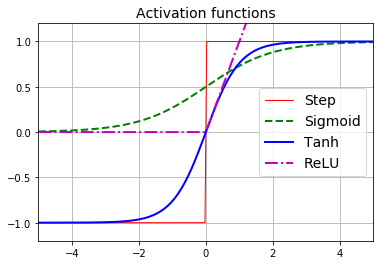

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure()

plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.show()

ReLU activation functions are good because they dont saturate for positive values and is fast to compute. However they can cause some neurons to die (*dying ReLUs*), so they only output 0, if weights are updated such that the weighted sum of the neurons inputs are negative. This can be helped by *leaky* ReLU, where a slope is defined by a hyperparameter to ensure they do not die<sup>1,2</sup>. 

**NOTES**
- code from https://github.com/ageron/handson-ml/blob/master/11_deep_learning.ipynb

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. Xu, B., Wang, N., Chen, T., & Li, M. (2015). Empirical evaluation of rectified activations in convolutional network. arXiv preprint arXiv:1505.00853.

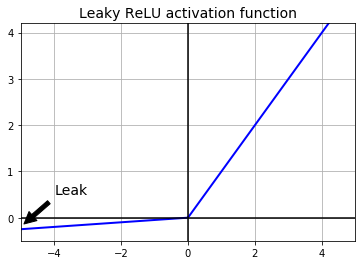

In [16]:
# for leaky_relu
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

z = np.linspace(-5, 5, 200)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

A variation on ReLU can also be used such as the *exponential linear unit (ELU)* which can take on negative values to alliviate vanishing gradients, has a nonzero gradient to avoid dying ReLUs, and can speed up Gradient Descent if the function is smooth<sup>2</sup>. It is still slower than ReLU to compute at testing time, but during testing has a faster convergence rate<sup>1</sup>.

**NOTES**
- code from https://github.com/ageron/handson-ml/blob/master/11_deep_learning.ipynb

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. Clevert, D. A., Unterthiner, T., & Hochreiter, S. (2015). Fast and accurate deep network learning by exponential linear units (elus). arXiv preprint arXiv:1511.07289.

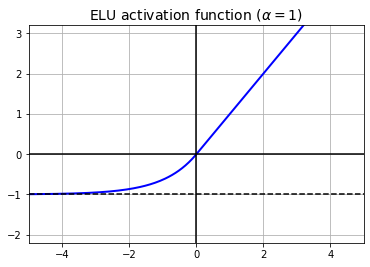

In [17]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

A further activation function is *scaled exponential linear units (SELU)*<sup>1</sup> which, when combined with LeCun initialization, will self-normalize to prevent the vanishing/exploding gradients problem. The default SELU hyperparameters (scale and alpha) are tuned so that the mean output of each neuron remains close to 0, and the standard deviation remains close to 1 provided the inputs are standardized with mean 0 and standard deviation 1 too<sup>2</sup>.

However, as the self-normalization is easily broken, it cannot be used with<sup>2</sup>:
- ℓ1 or ℓ2 regularization
- regular dropout (but can with Alpha Dropout: tf.contrib.nn.alpha_dropout())
- max-norm
- skip connections or other non-sequential topologies

**NOTES**
- code from https://github.com/ageron/handson-ml/blob/master/11_deep_learning.ipynb

---
1. Klambauer, G., Unterthiner, T., Mayr, A., & Hochreiter, S. (2017). Self-normalizing neural networks. In Advances in neural information processing systems (pp. 971-980).
2. https://github.com/ageron/handson-ml/blob/master/11_deep_learning.ipynb

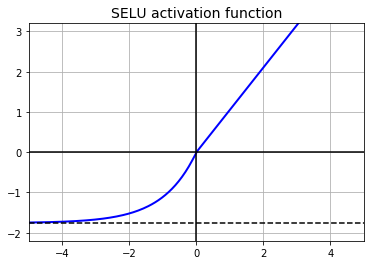

In [18]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In general, the best activation function to use are:
1. LU Variants
    1. SELU 
        - if using sequential CNNs
    2. ELU
        - if using recurrent neural networks
    3. Leaky ReLU
        - When runtime performance is preferable
2. ReLU
3. tanh
4. Logistic

Another common activation function is a softmax activation function. This is typically used to ensure the output of the estimated probabilities for class membership at the end of a model are between 0 and 1. It does this by suppressing values below a maximum value so the values sum to 1<sup>1</sup>.

**Note**
- the below diagram is adapted from<sup>1</sup> which has useful plots of more activation functions.

---
1.  https://adl1995.github.io/an-overview-of-activation-functions-used-in-neural-networks.html

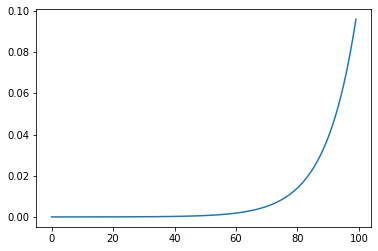

In [19]:
z = np.linspace(-5, 5, 100)
plt.plot(np.exp(z) / np.sum(np.exp(z)))
plt.show()

## Loss Functions

Now we need to measure how far the output of the model is from what we expected. This is were we define a "*loss function*" (or objective function) to take the predictions of the network and the true target and compute a score of how distant they are from each other.

Defining your loss is important but in general a rule you can use is<sup>1</sup>...

- ...binary crossentropy for a two-class classification problems
- ...categorical crossentropy for many-class classification problems
- ...mean-squared error for regression problems
- ...connectionist temporal classification (CTC) for a sequence-learning problems

As we are looking at a binary classification problem we will use binary crossentropy. Crossentropy comes from Information Theory and measures the distance between proability distributions; used here to measure the truth from the predictions<sup>1</sup>.

The loss function and last-layer activation work together so both should be considered. Heres a table below, again from Chollet, to help<sup>1</sup>:

| Problem Type                                            | Last-layer Activation | Loss Function                       |
|--------------------------------------------------------------|-----------------------------------|--------------------------------------------|
| Binary Classification                                | sigmoid                       | binary_crossentropy            |
| Multiclass, single-label Classification  | softmax                        | categorical_crossentropy   |
| Multiclass, multilabel Classification     | sigmoid                        | binary_crossentropy             |
| Regression to arbitary values                 | None                            | mse                                          |
| Regression to values between 0 and 1 | sigmoid                       | mse or binary_crossentropy |

**TODO**
- mention the different loss function for binary such as hinge detailed in https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/


---
1. Chollet, F. (2017). Deep learning with python. Manning Publications.

In [0]:
loss = 'binary_crossentropy'

## Optimizers
Once we have scored the output of our model, with our loss function, we want to feedback this back to the connections in the model. This is to adjust the weights so that they will lower the loss score for the current example of data. This adjustment is the job of the optimizer, which implements a Backpropagation algorithm<sup>8</sup>. At the start of a model the network weights are assigned random values, so that it randomly transforms the data. Over multipule examples fed to the system in a training loop, the weights are adjusted slightly in the right direction to decrease the loss. 

The loss can be thought of as on a slope, with each step change moving futher down the slope. By going against the curvature and updating the weights so you are moving in the opposite direction of the 'gradient', where the slope increases upwards, you intuitively should be lower on the loss curve. The process therefore becomes<sup>8</sup>:

1. Draw a batch of training samples x and corresponding targets y
2. Run the network on x to obtain predictions y_pred
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y
4. Compute the gradient of the loss with regard to the network’s parameters (a backward pass)
5. Move the parameters a little in the opposite direction from the gradient—for example W -= step * gradient—thus reducing the loss on the batch a bit

This process is known as mini-batch stochastic gradient descent (mini-batch SGD). Stochastic refers to each batch of data being drawn at random<sup>8</sup>. Other types of optimisation methods exist, such as those that take into account previous weight updates, rather than just the current value of the gradients, when computing the next weight update<sup>8</sup>. 

Here are a list of some Optimizers<sup>1<sup>:

**Gradient Descent**

Takes small regular steps down the slope. It updates the weights by subtracting the cost gradient from the weights, multiplied by the learning rate. 

**TODO**
- improve description, get reference

**Momentum Optimization<sup>2</sup>**

Momentum Optimization is influenced by the past gradients as at each iteration it subtracts the local gradient from the momentum vector, and adds this momentum vector to the weights. This means the gradient accelerates. To prevent the momentum growing too large, a friction term is set (0 high friction and 1 low). Due to momentum it may oscillate a few times by overshooting and come back before stabalizing at a minimum<sup>1</sup>.

*Advantages*
- It can escape plateus faster than Gradient Descent.
- If Batch Normalization is not used, upper layers will have inputs with different scales which this can help with

*Disadvantages*
- Add an extra hyperparameter but a 0.9 momentum is a good place to start

**Nesterov Accelerated Gradient (Nesterov Momentum optimization)<sup>3</sup>**

This is a variant on Momentum Optimization that mesaures the gradient of the cost function ahead in the direction of the momentum rather than the local position.

*Advantages*
- Nesterov may end up closer to the optimum than Momentum Optimization
- Nesterov converges faster than Momentum Optimization as it reduces oscillations

**AdaGrad<sup>4</sup>**

Gradient Descent goes down the steepest slope and all AdaGrad does is to scale down the gradient vector along the steepest dimensions so that it can correct the direction to point more towards the global optimum. This means the learning rate is decayed faster for steeper dimensions than those with gentler slopes (*adaptive learning rate*).

*Advantages*
- The learning rate requires less tuning
- performs well for simple quadratic problem and with Linear Regression

*Disadvantages*
- It often stops to early when training neural networks

**RMSProp<sup>5</sup>**

RMSProp aims to address the problem of stopping to early found in AdaGrad by accumulating the gradients from recent iterations rather than all the previous gradients. This is done using a decay hyperparameter, which 0.9 is a sensible default.

*Advantages*
- Does not stop to early

*Disadvantages*
- Adds another hyperparameter

**Adaptive Movement Estimation(Adam) Optimization<sup>6</sup>**

Combines elements of Momentum optimization and RMSProp by tracking the exponentially decaying average of past gradients as well as tracking the exponentially decaying average of past squared gradients. Again the defaults are pretty good.

*Advantages*
- Requires less tuning of learning hyperparameter
- Defaults are often very good

*Disadvantages*
- Can lead to solutions that generalize poorly on some datasets<sup>7</sup>

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. Polyak, B. T. (1964). Some methods of speeding up the convergence of iteration methods. USSR Computational Mathematics and Mathematical Physics, 4(5), 1-17.
3. Nesterov, Y. (1983). A method for unconstrained convex minimization problem with the rate of convergence O (1/k^ 2). In Doklady AN USSR (Vol. 269, pp. 543-547).
4. Duchi, J., Hazan, E., & Singer, Y. (2011). Adaptive subgradient methods for online learning and stochastic optimization. Journal of Machine Learning Research, 12(Jul), 2121-2159.
5. Tieleman, T., & Hinton, G. (2012). Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent magnitude. COURSERA: Neural networks for machine learning, 4(2), 26-31.
6. Kingma, D. P., & Ba, J. (2014). Adam: A method for stochastic optimization. arXiv preprint arXiv:1412.6980.
7. Wilson, A. C., Roelofs, R., Stern, M., Srebro, N., & Recht, B. (2017). The marginal value of adaptive gradient methods in machine learning. In Advances in Neural Information Processing Systems (pp. 4148-4158).
8.  Chollet, F. (2017). Deep learning with python. Manning Publications.

In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(0.001),
              loss=loss,
              metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

Comparison of some optimization methods (animation by [Alec Radford]). The star denotes the global minimum on the error surface.

![alt text](https://i.imgur.com/s25RsOr.gif)

[Alec Radford]: https://www.reddit.com/r/MachineLearning/comments/2gopfa/visualizing_gradient_optimization_techniques/ckloy0p/

Lets combine building the model into a function we can call. This will help us later when we want to load in the weights we have saved from training.

In [22]:
from tensorflow.keras.backend import clear_session

# Returns a short sequential model
def create_model():
  model = Sequential()

  model.add(Dense(units=300,
                  input_dim=X_train.shape[1],
                  activation='relu'))

  model.add(Dense(units=100,
                  activation='relu'))

  model.add(Dense(units=1,
                  activation='sigmoid'))

  model.compile(optimizer=Adam(0.001),
                loss=loss,
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

  return model

clear_session()
# Create a basic model instance
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               389700    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 419,901
Trainable params: 419,901
Non-trainable params: 0
_________________________________________________________________


## Callback Functions

It is worth noting that as the models gets better on training data, neural networks eventually start overfitting. This means we should monitor the performance of the model on data that is outside of the training set (validation data). We should also set some parameters to save models when they improve on our chosen metric. We can do this using Callback Functions.

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_filepath = "Best_MLP_Model.ckpt"

# Save the model under certain conditions
callback_checkpoint = ModelCheckpoint(filepath=best_model_filepath,
                                      monitor='val_loss',
                                      verbose=0,
                                      save_weights_only=True,
                                      save_best_only=True)

A regularization method to stop overfitting models is to interrupt training when the performance on the validation set starts dropping. You can evaluate the model on a validation set at regular intervals and save snapshots of the performance. Once a limit on training is reached, you restore the best model snapshot. Although it works well, its best to combine with other regularization methods<sup>1</sup>.

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, 
                                        verbose=1)

**TODO**
- use tensorboard more in tutorial

In [0]:
from tensorflow.python.keras.callbacks import TensorBoard

tensorboard_logs_filepath = "./MLP_logs/"

callback_tensorboard = TensorBoard(log_dir=tensorboard_logs_filepath,
                                   histogram_freq=0,
                                   write_graph=False)

We can also change the learning rate during the course of training. If a learning rate is too high then training may diverge, and if too low then it will take a very long time to converge. Rather than a constant learning rate, the learning rate can start high and reduce once progress slows<sup>1</sup>.

Different methods include:
- Predetermined piecewise constant learning rate
    - Learning rate changes after x number of epochs
- Performance Scheduling
    - Measure validation error every n steps and reduce the learning by a factor of λ when error stops dropping
- Exponential Scheduling
    - Set the learning rate to a function of the iteration number, dropping by a factor of 10 every r steps
    - Prefered when compared to the other methods in Senior et al. (2013)<sup>2</sup>.
- Power Scheduling
    - Similar to Exponential Scheduling but drops slower
    
We will change the learning rate for the optimizer when the loss does not change. This could be used to try escape local minima or just boost the performance of the model a little bit more at the end of training. We set the learning rate to 1e-3 previously, so we will multiply it by 0.1 to make it 1e-4 once the validation loss doesnt change from an epoch.
    
---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. Senior, A., Heigold, G., & Yang, K. (2013, May). An empirical study of learning rates in deep neural networks for speech recognition. In 2013 IEEE International Conference on Acoustics, Speech and Signal Processing (pp. 6724-6728). IEEE.

In [0]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

We can make another function here to help make it quicker to set up

In [0]:
def create_callbacks(best_model_filepath, tensorboard_logs_filepath):

  callback_checkpoint = ModelCheckpoint(filepath=best_model_filepath,
                                        monitor='val_loss',
                                        verbose=0,
                                        save_weights_only=True,
                                        save_best_only=True)
  
  callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, 
                                        verbose=1)
  
  callback_tensorboard = TensorBoard(log_dir=tensorboard_logs_filepath,
                                   histogram_freq=0,
                                   write_graph=False)
  
  callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)
  
  return [callback_checkpoint, callback_early_stopping,
          callback_tensorboard, callback_reduce_lr]

## Train Model

We have unballanced data so lets set a class weight

In [0]:
from sklearn.utils import class_weight
# calculate the class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(y_train),
                                                  y_train)

Now we iterate on the training data by fitting the model, alike to sklearn.

We can also specify the validation_data so we can see how the model generalises to data it is not trained on at each epoch

**TODO**
- Write about how batch size can change performance

**NOTE**
- It is common to see batchsizes double from 32 (e.g. [32, 64, 128]) depending on data size.

In [29]:
EPOCHS = 20
BATCH_SIZE = 64

history = model.fit(X_train, 
                    y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS,
                    validation_split=0.1,
                    callbacks= create_callbacks(best_model_filepath, 
                                                tensorboard_logs_filepath),
                    class_weight = class_weights,
                    verbose=1)

Train on 14009 samples, validate on 1557 samples
Epoch 1/20
14009/14009 [==============================] - 4s 320us/sample - loss: 0.0393 - accuracy: 0.9879 - AUC: 0.9844 - Recall: 0.8562 - Precision: 0.8661 - val_loss: 0.0241 - val_accuracy: 0.9917 - val_AUC: 0.9964 - val_Recall: 0.8431 - val_Precision: 0.8958
Epoch 2/20
13824/14009 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9933 - AUC: 0.9990 - Recall: 0.9110 - Precision: 0.9357
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
14009/14009 [==============================] - 2s 119us/sample - loss: 0.0163 - accuracy: 0.9934 - AUC: 0.9990 - Recall: 0.9118 - Precision: 0.9362 - val_loss: 0.0374 - val_accuracy: 0.9891 - val_AUC: 0.9855 - val_Recall: 0.8824 - val_Precision: 0.8036
Epoch 3/20
13568/14009 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9982 - AUC: 0.9999 - Recall: 0.9764 - Precision: 0.9831
Epoch 00003: ReduceLROnPlateau reducing learning ra

So lets recap. Training a neural network with keras uses the following objects<sup>1</sup>:

1. The input data and corresponding targets
2. Layers, which are combined into a network (or model) to map the input data to predictions
3. The loss function, which defines the feedback signal used for learning by comparing the predictions to the targets
4. The optimizer, which determines how learning proceeds by using this loss value to update the network’s weights.
5. Choose some metrics to monitor
6. Set any callbacks to monitor the model performance
7. Iterate on training data by calling the fit() method of the model

## Evaluate Model

Lets have a look at evaluating the models training

**TODO**
- talk about model performance

**NOTES**
- code<sup>1</sup>

---
1. Chollet, F. (2017). Deep learning with python. Manning Publications.

In [30]:
list(history.history.keys())

['loss',
 'accuracy',
 'AUC',
 'Recall',
 'Precision',
 'val_loss',
 'val_accuracy',
 'val_AUC',
 'val_Recall',
 'val_Precision',
 'lr']

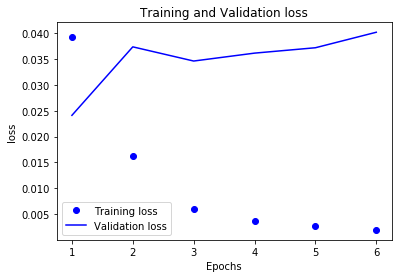

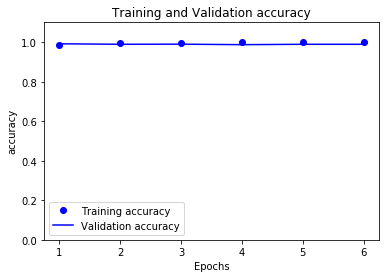

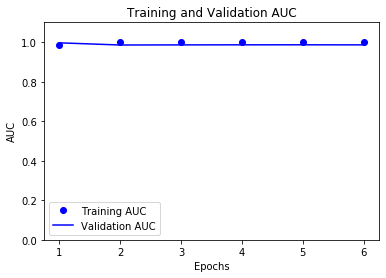

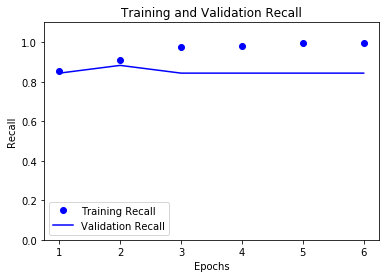

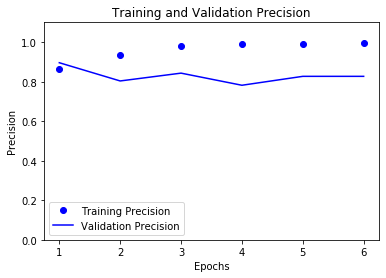

In [31]:
import matplotlib.pyplot as plt

def plot_progress(history_dict):
  for key in list(history_dict.keys())[:5]:
    plt.clf() # Clears the figure
    training_values = history_dict[key] 
    val_values = history_dict['val_'+key]

    epochs = range(1, len(training_values) + 1)

    plt.plot(epochs, training_values, 'bo', label='Training '+key)

    plt.plot(epochs, val_values, 'b', label='Validation '+key)

    if key != 'loss':
      plt.ylim([0.,1.1])

    plt.title('Training and Validation '+key) 
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend()
    plt.show()
    
plot_progress(history.history)

Now normally we would only look at the test set performance once you have your final model, but to show how you do it lets peek now.

Remember we saved the model when it improved on the validation set, which is not neccissarily the last epoch because of the chance of overfitting.

In [32]:
clear_session()

model = create_model()
model.load_weights(best_model_filepath)
metrics = model.evaluate(X_test, y_test)

pd.DataFrame(metrics, index = model.metrics_names)

5050/5050 [==============================] - 1s 221us/sample - loss: 0.0115 - accuracy: 0.9976 - AUC: 0.9981 - Recall: 0.9115 - Precision: 0.9810


,0
loss,0.011484
accuracy,0.997624
AUC,0.998093
Recall,0.911504
Precision,0.980952


# Additional Model Parameters

Now lets look at some more options to improve our model

## Batch Generator

Instead of using the fit method we may want to change how batches are made. With this method we do need to specify our own validation set.

In [0]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.1

train_list, test_list = train_test_split(key_list, test_size=TEST_SIZE, 
                                         random_state=RANDOM_STATE)
train_list, val_list = train_test_split(train_list, test_size=TEST_SIZE, 
                                         random_state=RANDOM_STATE)
data_lists = {'train': train_list, 
              'test': test_list,
              'val': val_list,
              }

data_dict = make_data(data_lists)

X_train = data_dict['train'].values
X_val = data_dict['val'].values
X_test = data_dict['test'].values
y_train = data_dict['train'].index.values
y_val = data_dict['val'].index.values
y_test = data_dict['test'].index.values
feat_names = list(data_dict['train'].columns)

# lets change integers
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

There are some useful batch generators that are easy to impliment. As we are using an imballanced dataset, we can use an already made one to ballance it up.

In [35]:
from imblearn.tensorflow import balanced_batch_generator
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
training_generator, steps_per_epoch = balanced_batch_generator(X_train, 
                                                               y_train, 
                                                               sampler=RandomOverSampler(), 
                                                               batch_size=BATCH_SIZE, 
                                                               random_state=RANDOM_STATE)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from s

Now we can create the model as before except we use the fit_generator instead of just fit

**TODO**
- update to just fit as this has changed

In [37]:
from math import ceil

# clear the previous keras model
clear_session()

model = create_model()

callbacks = create_callbacks('Best_bal_MLP_Model.ckpt',
                            './bal_MLP_logs/')

# This is the different bit
# =======================================================
history = model.fit_generator(generator=training_generator,
                              epochs=EPOCHS,
                              steps_per_epoch=steps_per_epoch,
                              validation_data = (X_val, y_val),
                              callbacks=callbacks,
                              verbose=1)
# =======================================================

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 439 steps, validate on 2411 samples
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


439/439 [==============================] - 5s 10ms/step - loss: 0.0282 - accuracy: 0.9907 - AUC: 0.9988 - Recall: 0.9935 - Precision: 0.9879 - val_loss: 0.0902 - val_accuracy: 0.9805 - val_AUC: 0.9814 - val_Recall: 0.8408 - val_Precision: 0.9185
Epoch 2/20
433/439 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9990 - AUC: 0.9998 - Recall: 0.9994 - Precision: 0.9985
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
439/439 [==============================] - 3s 7ms/step - loss: 0.0044 - accuracy: 0.9990 - AUC: 0.9998 - Recall: 0.9994 - Precision: 0.9985 - val_loss: 0.1110 - val_accuracy: 0.9826 - val_AUC: 0.9715 - val_Recall: 0.8706 - val_Precision: 0.9162
Epoch 3/20
433/439 [============================>.] - ETA: 0s - loss: 9.1985e-04 - accuracy: 0.9998 - AUC: 1.0000 - Recall: 1.0000 - Precision: 0.9996
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
439/439 [==============================] - 3s 7ms/step - loss: 9.

You can see there is still poor overfitting.

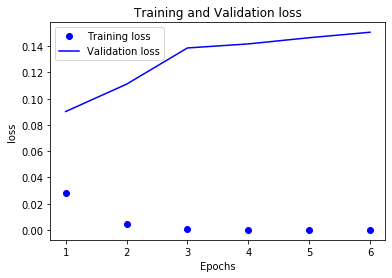

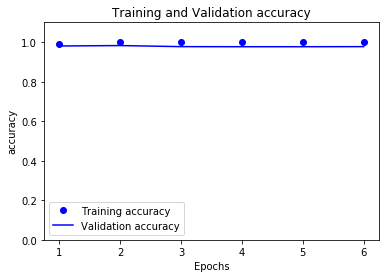

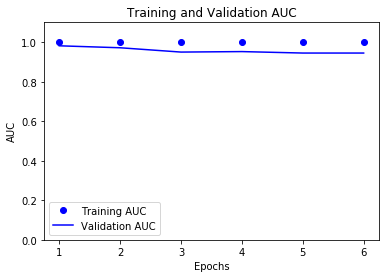

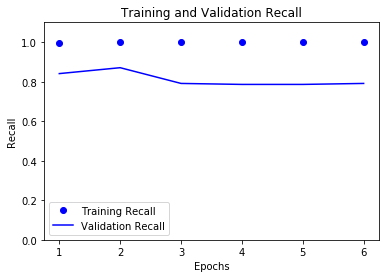

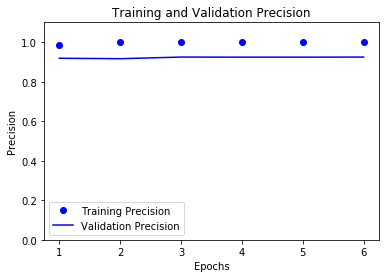

In [38]:
plot_progress(history.history)

## Normalization

**TODO**
- reformat this text to fit the new focus on the Keras API and move low level api stuff into the extra notebook focusing on that!

**Batch Normalization**

Backpropagation means that the error gradients are propagated from the output layer to the input layer. Once the gradient of the cost function is computed it updates each parameter with a Gradient Descent step. However, gradients often get smaller as the algorithm progresses down to lower layers, therefore Gradient Descent leaves these lower layer connection weights mostly unchanged (*vanishing gradients*). This prevents training does not converge on a good solution. The opposite can also happen, in particular with recurrent neural networks, where gradients grow bigger so layers get large weight updates (*exploding gradients*)<sup>1</sup>.

If we don't want the signal to die out or explode, then the variance of the output signal should be the same as the signal inputs and the gradients to have equal variance before and after flowing through a layer. The easiest way of doing this is to initialized the connection weights randomly using a strategy such as *Xavier initalization* (or *Glorot initialization*), or *He initalization*. By default *tf.layers.dense()* uses Xavier initalization with a uniform distribution, but can be changed using the *kernel_initializer* variable and the *tf.contrib.layers.variance_scaling_initializer()*. You can set the model to count the number of input connections, output, or the average (Xavier by default uses average)<sup>1</sup>.

~~~
he_init = tf.variance_scaling_initializer()
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu,
                          kernel_initializer=he_init, name="hidden1")
~~~

Batch Normalization also addresses the vanishing/exploding gradients and *Internal Covariate Shift* problem, where the distribution of each layers inputs changes during training as previous layers change. An operation is added before the activiation function of each layer to zero center and normalize the inputs, then scale and shift results to allow for the learning of the model to the optimal sclae and mean of the inputs to each layer. At test time the whole training set's mean and standard deviation is used.

Batch Normalization is benificial as it means networks...
- ...are less sensitive to weight initialization
- ...are able to have larger learning weights
- ...have improved accuracy
- ...have a reduced need for a regulization techniques
- ...does not need to have input data already normalized

However it does add complexity so there is a runtime penalty at both training and testing phases<sup>2</sup>.

The easiest way to impliment it is to use the tf.layers API

Batch Norm and ELU are unlikely to have very positive impact in shallow networks so lets build a bigger one<sup>1</sup>

**Gradient Clipping**

A method to stop exploding gradients is to clip them during backpropogation so they do not exceed a threshold (useful for recurrent neural networks)<sup>1</sup>. In general Batch Normalization is now prefered.

---
1. Pascanu, R., Mikolov, T., & Bengio, Y. (2013, February). On the difficulty of training recurrent neural networks. In International conference on machine learning (pp. 1310-1318).
2. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. https://github.com/ageron/handson-ml/blob/master/11_deep_learning.ipynb

In [39]:
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

# Returns a short sequential model
def create_batch_model(dense_layers=2, units_first=300, units_hidden=100):
  model = Sequential()

  for dense_layer in range(dense_layers):
      if dense_layer == 0:
        model.add(Dense(units=units_first,
                        input_dim=X_train.shape[1]))
      else:
        model.add(Dense(units=units_hidden))
      
      model.add(BatchNormalization())
      model.add(Activation('relu'))

  model.add(Dense(units=1,
                  activation='sigmoid'))

  model.compile(optimizer=Adam(0.001),
                loss=loss,
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

  return model

clear_session()
# Create a basic model instance
model = create_batch_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               389700    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

## Regularization

We have already seen some regularization methods, however here are some more...

**l1 and l2 Regularization**

Alike to other linear models you can use l1 and l2 Regularization to constrain the networks connection weights. This can be done by adding the terms to the cost function.

**Max-Norm Regularization**

For each neuron, the weights of the input connections are constrained, with clipping if needed.

*Advantages*
- help reduce overfitting
- alleviate vanishing/exploding gradients (if not using batch normalization)

**Dropout<sup>2,3</sup>**

This is the most popular regularization method as it has been shown to improve the accuracy of start-of-the-art models. At each training step, every input neuron has a probability of beinf temporarily 'dropped out'. Dropout is typically set around 50%. This dropout only happens at training. Dropout means the network cannot rely on a few input neurons meaning it is more robust and can generalize better.

One important thing to note is that if the proability of dropping is set at 50%, that means during testing there could be twice as many inputs. This means we need to multiply the weights by 0.5 after training to account for this. 

Monte-Carlo Dropout (MC Dropout) essentially means applying dropout during predictions (not just training). Generally makes predictions less certain.

Lets do a model with dropout.

---
2. Hinton, G. E., Srivastava, N., & Krizhevsky, A. (2015). Improving neural networks by preventing co-adaption of feature detectors [R/OL].
3. Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: a simple way to prevent neural networks from overfitting. The Journal of Machine Learning Research, 15(1), 1929-1958.

In [40]:
from tensorflow.keras.layers import Dense, Activation, Dropout

class MCDropout(Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

# Returns a sequential model
def create_dropout_model(dense_layers=2, units_first=300, units_hidden=100, 
                         mcdropout = False, dropout_rate = 0.5):
  model = Sequential()

  for dense_layer in range(dense_layers):
      if dense_layer == 0:
        model.add(Dense(units=units_first,
                        input_dim=X_train.shape[1],
                        activation='relu'))
      else:
        model.add(Dense(units=units_hidden,
                        activation='relu'))
      
      if mcdropout:
        model.add(MCDropout(rate=dropout_rate))
      else:
        model.add(Dropout(rate=dropout_rate))

  model.add(Dense(units=1,
                  activation='sigmoid'))

  model.compile(optimizer=Adam(0.001),
                loss=loss,
                metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

  return model

clear_session()
# Create a basic model instance
model = create_dropout_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               389700    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 419,901
Trainable params: 419,901
Non-trainable params: 0
_________________________________________________________________


# Model Design

The number of possible hyperparameters means it can be hard to find the best way to set up a neural net. Options include a manual search, randomized search, or a tool such as Oscar (http://oscar.calldesk.ai/).

## Manual Search

To start with, try a single hidden layer as this can give reasonable results if given enough neurons. However it is faster to train a deeper net with fewer neurons due to them having higher parameter efficency. You can gradually increase the number of hidden layers until you overfit the training set<sup>1</sup>.

The input and output neurons is determained by the task (e.g. data length and classes to predict). Hidden layers are often formed into a funnel getting thinner towards the output. This is to account for low level features being formed into higher-level features. However it is also common that you may use the same number of neurons for each layer, meaning thats only 1 hyperparameter instead of one per layer. The number of neurons therefore becomes the what is changed. Another approach is to pcik a model with lots of layers and neurons and use early stopping or regulation techniques, such as dropout, to prevent overfitting<sup>1</sup>.

For activation functions in the hidden layers, in most cases ReLU is a faster and less likely to get stuck on plateaus during Gradient Descent as other activation functions. A softmax activation function is generally good for mutually exclusive classification tasks. If they are not mutually exclusive or there are just two classes, the logistic function is better. For regression tasks, dont use one<sup>1</sup>.

As proposed by Géron, A. (2017)<sup>1</sup>

| stuff                  | stuff 2                      |
|------------------------|------------------------------|
| Initalization          | He Initialization            |
| Activation Function    | ELU                          |
| Normalization          | Batch Normalization          |
| Regularization         | Dropout                      |
| Optimizer              | Nestrov Accelerated Gradient |
| Learning Rate Schedule | None                         |

When building a model you have to decide on a number of layers, their type, and size. Burkov (2019)<sup>2</sup> recommends starting with one or two layers and increasing the size of each layer and the number of layers until the model fits the training data well. Once fitted well to the training data, but not the validation data, add regularisation to the model, increasing the network again if regularisation has affected training data fitting. This is continued until both training and validation models fit well.

**NOTE**
- This time I write it out in full rather than using functions just to show how little codes is actually required when using Keras for building a MLP model

---
1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
2. Burkov, A. (2019). The Hundred - Page Machine Learning Book. Andriy Burkov.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               389700    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


  9/562 [..............................] - ETA: 1:55 - loss: 0.4719 - accuracy: 0.8444 - AUC: 0.9083 - Recall: 0.8326 - Precision: 0.8479

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


561/562 [============================>.] - ETA: 0s - loss: 0.2991 - accuracy: 0.9804 - AUC: 0.9954 - Recall: 0.9800 - Precision: 0.9807WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./Best_Deep_MLP_Model.ckpt/assets
562/562 [==============================] - 11s 20ms/step - loss: 0.2990 - accuracy: 0.9804 - AUC: 0.9954 - Recall: 0.9801 - Precision: 0.9807 - val_loss: 0.2026 - val_accuracy: 0.9830 - val_AUC: 0.9932 - val_Recall: 0.8607 - val_Precision: 0.9301
Epoch 2/20
557/562 [============================>.] - ETA: 0s - loss: 0.1998 - accuracy: 0.9927 - AUC: 0.9984 - Recall: 0.9971 - Precision: 0.9885
Epoch 00002: ReduceLROnPlateau reducing 

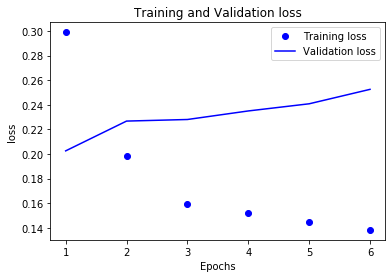

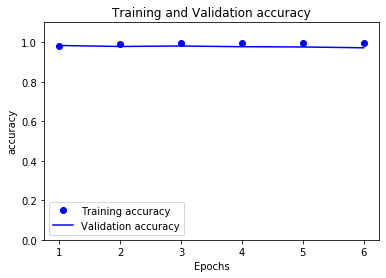

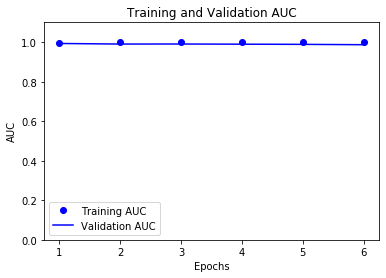

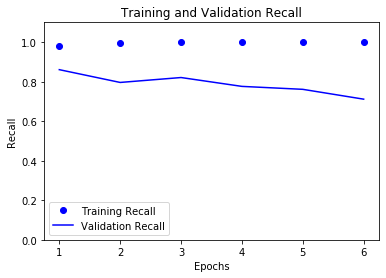

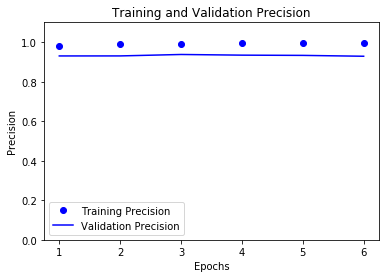

In [41]:
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import optimizers

best_model_filepath = os.path.join(CLASS_BACK, "Best_Deep_MLP_Model.ckpt")

clear_session()

model = Sequential()

# Input layer
model.add(Dense(units=300,  
                input_dim=X_train.shape[1],
                kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(rate=0.5,seed=RANDOM_STATE))

# Hidden layers
for hidden_layer in range(2):
    model.add(Dense(units=50,
                    kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(rate=0.5,seed=RANDOM_STATE))

# Output layer
model.add(Dense(units=1,
                kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

model.summary()

# Save the model under certain conditions
callback_checkpoint = ModelCheckpoint(filepath=best_model_filepath,
                                      monitor='val_loss',
                                      verbose=0,
                                      save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, 
                                        verbose=1)

callback_tensorboard = TensorBoard(log_dir='./bal_MLP_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

training_generator, steps_per_epoch = balanced_batch_generator(X_train, 
                                                               y_train, 
                                                               sampler=RandomOverSampler(), 
                                                               batch_size=50, 
                                                               random_state=42)

history = model.fit_generator(generator=training_generator,
                              epochs=20,
                              steps_per_epoch=steps_per_epoch,
                              validation_data = (X_val, y_val),
                              callbacks=[callback_early_stopping,
                                         callback_checkpoint,
                                         callback_tensorboard,
                                         callback_reduce_lr],
                              verbose=1)

plot_progress(history.history)

## Parameter Optimisation

You can of course use some of the previously used optimisation methods (e.g. Hyperopt), but here I'll introduce some new ones.

### Talos

**TODO**
- do an example with talos as seems very simple to add (https://github.com/autonomio/talos)

### HpBandSter

First we'll set up the configuration space of the possible parameter values that could be selected.

In [42]:
import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH

def get_configspace():
      
    cs = CS.ConfigurationSpace()

    # --------------
    # General Params
    # --------------
    learning_rate = CSH.UniformFloatHyperparameter('learning_rate', lower=0.01, 
                                                   upper=0.2, default_value=0.1, 
                                                   log=True)
    batch_size = CSH.CategoricalHyperparameter('batch_size', [32, 64])
    cs.add_hyperparameters([learning_rate, batch_size])
    
    # ------------
    # Dense Layers
    # ------------
    dense_layers = CSH.UniformIntegerHyperparameter('dense_layers', lower=1, 
                                                    upper=5, default_value=2)
    units_first = CSH.UniformIntegerHyperparameter('units_first', lower=3, 
                                                   upper=300, default_value=300) # first bigger than hidden
    units_hidden = CSH.UniformIntegerHyperparameter('units_hidden', lower=2, 
                                                    upper=300, default_value=100)

    cs.add_hyperparameters([dense_layers, units_first, units_hidden])
    
    # make units_hidden an active hyperparameter if dense_layers is greater than 1
    cs.add_conditions([CS.GreaterThanCondition(units_hidden, dense_layers, 1)])

    return cs

cs = get_configspace()
config = cs.sample_configuration().get_dictionary()
print(config)

{'batch_size': 64, 'dense_layers': 4, 'learning_rate': 0.01833276507683601, 'units_first': 46, 'units_hidden': 109}


In [43]:
from tensorflow.keras.layers import Input

def create_model(config, n_feat):
  model = Sequential()

  # -----------
  # Input Layer
  # -----------
  model.add(Input(shape=n_feat))

  # ------------
  # Dense Layers
  # ------------
  for dense_layer in range(config['dense_layers']):
    if dense_layer == 0:
      units = config['units_first']
    else:
      units = config['units_hidden']
    model.add(Dense(units=units))
    
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    
    model.add(Dropout(rate=0.5))

  # ------------
  # Output Layer
  # ------------
  model.add(Dense(units=1, activation = 'sigmoid'))
  
  return model

run_id = 'test'
test_model = create_model(config, X_train.shape[1])
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 46)                59754     
_________________________________________________________________
batch_normalization_4 (Batch (None, 46)                184       
_________________________________________________________________
activation_4 (Activation)    (None, 46)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 46)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 109)               5123      
_________________________________________________________________
batch_normalization_5 (Batch (None, 109)               436       
_________________________________________________________________
activation_5 (Activation)    (None, 109)              

In [44]:
from hpbandster.core.worker import Worker

class MyWorker(Worker):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    
    self.x_train = X_train
    self.x_val = X_val
    self.y_train = y_train
    self.y_val = y_val

    self.n_feat = self.x_train.shape[1]

    setattr(self.__class__, 'get_configspace', staticmethod(get_configspace))
  
  
  def compute(self, config, budget, working_directory, *args, **kwargs):
    clear_session()

    training_generator, steps_per_epoch =\
    balanced_batch_generator(self.x_train, self.y_train,
                             batch_size=config['batch_size'])
    
    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=5, 
                                   verbose=1)

    # Create Model
    model = create_model(config, self.x_train.shape[1])

    model.compile(optimizer=Adam(learning_rate=config['learning_rate']),
                  metrics=['accuracy', 'Recall', 'Precision'],
                  loss='binary_crossentropy')

    # Train
    history = model.fit_generator(generator=training_generator,
                                  epochs=int(budget),
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data = (self.x_val, self.y_val),
                                  callbacks=[early_stopping],
                                  verbose=1)
  
    # need to make the types of data floats not numpy.floats
    history_dict = history.history
    info_dict = {}
    for key in history_dict.keys():
        history_dict[key] = list(map(float, history_dict[key])) 
    info_dict.update(history_dict)

    return ({'loss': 1- history_dict['val_Precision'][-1], # remember: HpBandSter always minimizes!
             'info': info_dict})


worker = MyWorker(run_id=run_id)
res = worker.compute(config=config, budget=1, working_directory='.')
print(res)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


  ...
    to  
  ['...']


19:27:09 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 15 steps, validate on 2411 samples
11/15 [=====================>........] - ETA: 0s - loss: 0.2946 - accuracy: 0.8764 - Recall: 0.8494 - Precision: 0.8979

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


15/15 [==============================] - 2s 159ms/step - loss: 0.2519 - accuracy: 0.9042 - Recall: 0.8810 - Precision: 0.9234 - val_loss: 6.9351 - val_accuracy: 0.8105 - val_Recall: 1.0000 - val_Precision: 0.3055
{'loss': 0.6945288777351379, 'info': {'loss': [0.25186533890664575], 'accuracy': [0.9041666388511658], 'Recall': [0.8810020685195923], 'Precision': [0.9234135746955872], 'val_loss': [6.9351040721709225], 'val_accuracy': [0.8104521036148071], 'val_Recall': [1.0], 'val_Precision': [0.30547112226486206]}}


In [45]:
from hpbandster.optimizers.bohb import BOHB
import hpbandster.core.nameserver as hpns
import hpbandster.core.result as hpres
import pickle

host = '127.0.0.1'
port = 9090
save_dir = '.'
run_id = 'MLP'

if __name__ == "__main__":
  result_logger = hpres.json_result_logger(directory=save_dir, overwrite=True)
  
  NS = hpns.NameServer(run_id=run_id, 
                       working_directory = save_dir,
                       host=host,
                       port=port)
  NS.start()
  
  worker = MyWorker(run_id=run_id, nameserver =host)
  worker.run(background=True)

  bohb = BOHB(configspace = worker.get_configspace(),
              run_id = run_id, nameserver=host,
              min_budget=1, max_budget=5, # budget in this case means epochs!
              result_logger=result_logger,
             )
  res = bohb.run(n_iterations=5)
  
  bohb.shutdown(shutdown_workers=True)
  NS.shutdown()

19:27:22 DISPATCHER: started the 'discover_worker' thread
19:27:22 wait_for_workers trying to get the condition
19:27:22 WORKER: Connected to nameserver <Pyro4.core.Proxy at 0x7f3fb0dadeb8; connected IPv4; for PYRO:Pyro.NameServer@127.0.0.1:9090>
19:27:22 DISPATCHER: started the 'job_runner' thread
19:27:22 WORKER: No dispatcher found. Waiting for one to initiate contact.
19:27:22 WORKER: start listening for jobs
19:27:22 DISPATCHER: Pyro daemon running on localhost:40829
19:27:22 DISPATCHER: Starting worker discovery
19:27:22 DISPATCHER: Found 1 potential workers, 0 currently in the pool.
19:27:22 DISPATCHER: discovered new worker, hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184
19:27:22 HBMASTER: number of workers changed to 1
19:27:22 DISPATCHER: jobs to submit = 0, number of idle workers = 1 -> waiting!
19:27:22 Enough workers to start this run!
19:27:22 adjust_queue_size: lock accquired
19:27:22 HBMASTER: starting run at 1583609242.8097627
19:27:22 HBMASTER: adjusted que

  ...
    to  
  ['...']


19:27:23 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
18/30 [=================>............] - ETA: 1s - loss: 0.2799 - accuracy: 0.9184 - Recall: 0.8834 - Precision: 0.9470

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 3s 105ms/step - loss: 0.2039 - accuracy: 0.9396 - Recall: 0.9158 - Precision: 0.9603 - val_loss: 3.7214 - val_accuracy: 0.9249 - val_Recall: 0.9851 - val_Precision: 0.5266


19:27:26 WORKER: done with job (0, 0, 0), trying to register it.
19:27:26 DISPATCHER: job (0, 0, 0) finished
19:27:26 WORKER: registered result for job (0, 0, 0) with dispatcher
19:27:26 DISPATCHER: register_result: lock acquired
19:27:26 DISPATCHER: job (0, 0, 0) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:27:26 job_id: (0, 0, 0)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 5, 'learning_rate': 0.013676652928876662, 'units_first': 166, 'units_hidden': 220}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 0.4734042286872864, 'info': {'loss': [0.20386494317402443], 'accuracy': [0.9395833611488342], 'Recall': [0.9157894849777222], 'Precision': [0.9602649211883545], 'val_loss': [3.7213830690707144], 'val_accuracy': [0.9249274134635925], 'val_Recall': [0.9850746393203735], 'val_Precision': [0.5265957713127136]}}
exception: None

19:27:26 job_callback for (0, 0, 0) started
19:27:26 job_callback for (0, 0, 0) got condition
19:27:2

  ...
    to  
  ['...']


19:27:27 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 15 steps, validate on 2411 samples
 8/15 [===============>..............] - ETA: 1s - loss: 0.2748 - accuracy: 0.8809 - Recall: 0.8554 - Precision: 0.8950 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


15/15 [==============================] - 2s 134ms/step - loss: 0.2095 - accuracy: 0.9187 - Recall: 0.8958 - Precision: 0.9389 - val_loss: 1.9503 - val_accuracy: 0.8706 - val_Recall: 0.9900 - val_Precision: 0.3910


19:27:29 WORKER: done with job (0, 0, 1), trying to register it.
19:27:29 WORKER: registered result for job (0, 0, 1) with dispatcher
19:27:29 DISPATCHER: job (0, 0, 1) finished
19:27:29 DISPATCHER: register_result: lock acquired
19:27:29 DISPATCHER: job (0, 0, 1) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:27:29 job_id: (0, 0, 1)
kwargs: {'config': {'batch_size': 64, 'dense_layers': 3, 'learning_rate': 0.0260834334197807, 'units_first': 154, 'units_hidden': 27}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 0.6090373396873474, 'info': {'loss': [0.20954266314705214], 'accuracy': [0.918749988079071], 'Recall': [0.8958333134651184], 'Precision': [0.9388646483421326], 'val_loss': [1.950342891012478], 'val_accuracy': [0.8705931305885315], 'val_Recall': [0.9900497794151306], 'val_Precision': [0.3909626603126526]}}
exception: None

19:27:29 job_callback for (0, 0, 1) started
19:27:29 DISPATCHER: Trying to submit another job.
19:27:29 DI

  ...
    to  
  ['...']


19:27:29 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 15 steps, validate on 2411 samples
14/15 [===========================>..] - ETA: 0s - loss: 0.3841 - accuracy: 0.9040 - Recall: 0.8843 - Precision: 0.9247

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


15/15 [==============================] - 2s 130ms/step - loss: 0.3600 - accuracy: 0.9104 - Recall: 0.8900 - Precision: 0.9286 - val_loss: 13.8978 - val_accuracy: 0.8577 - val_Recall: 0.9851 - val_Precision: 0.3680


19:27:31 WORKER: done with job (0, 0, 2), trying to register it.
19:27:31 WORKER: registered result for job (0, 0, 2) with dispatcher
19:27:31 DISPATCHER: job (0, 0, 2) finished
19:27:31 DISPATCHER: register_result: lock acquired
19:27:31 DISPATCHER: job (0, 0, 2) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:27:31 job_id: (0, 0, 2)
kwargs: {'config': {'batch_size': 64, 'dense_layers': 3, 'learning_rate': 0.07359083315431945, 'units_first': 112, 'units_hidden': 220}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 0.6319702565670013, 'info': {'loss': [0.35997758073111374], 'accuracy': [0.9104166626930237], 'Recall': [0.8900414705276489], 'Precision': [0.9285714030265808], 'val_loss': [13.897789529684538], 'val_accuracy': [0.8577353954315186], 'val_Recall': [0.9850746393203735], 'val_Precision': [0.36802974343299866]}}
exception: None

19:27:31 job_callback for (0, 0, 2) started
19:27:31 DISPATCHER: Trying to submit another job.
19:27:

  ...
    to  
  ['...']


19:27:32 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
Epoch 1/5
12/30 [===========>..................] - ETA: 2s - loss: 0.2946 - accuracy: 0.9115 - Recall: 0.8980 - Precision: 0.9263

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 3s 96ms/step - loss: 0.2271 - accuracy: 0.9375 - Recall: 0.9312 - Precision: 0.9430 - val_loss: 1.5710 - val_accuracy: 0.9332 - val_Recall: 0.9851 - val_Precision: 0.5562
Epoch 2/5
30/30 [==============================] - 1s 22ms/step - loss: 0.1107 - accuracy: 0.9739 - Recall: 0.9749 - Precision: 0.9729 - val_loss: 0.2441 - val_accuracy: 0.9718 - val_Recall: 0.9851 - val_Precision: 0.7529
Epoch 3/5
30/30 [==============================] - 1s 21ms/step - loss: 0.0785 - accuracy: 0.9781 - Recall: 0.9791 - Precision: 0.9770 - val_loss: 0.1312 - val_accuracy: 0.9813 - val_Recall: 0.9801 - val_Precision: 0.8277
Epoch 4/5
30/30 [==============================] - 1s 22ms/step - loss: 0.0837 - accuracy: 0.9823 - Recall: 0.9875 - Precision: 0.9774 - val_loss: 0.0977 - val_accuracy: 0.9822 - val_Recall: 0.9602 - val_Precision: 0.8465
Epoch 5/5
30/30 [==============================] - 1s 22ms/step - loss: 0.0695 - accuracy: 0.9823 - Recall: 0.9853 - Preci

19:27:38 WORKER: done with job (0, 0, 0), trying to register it.
19:27:38 WORKER: registered result for job (0, 0, 0) with dispatcher
19:27:38 DISPATCHER: job (0, 0, 0) finished
19:27:38 DISPATCHER: register_result: lock acquired
19:27:38 DISPATCHER: job (0, 0, 0) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:27:38 job_id: (0, 0, 0)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 5, 'learning_rate': 0.013676652928876662, 'units_first': 166, 'units_hidden': 220}, 'budget': 5.0, 'working_directory': '.'}
result: {'loss': 0.13242006301879883, 'info': {'loss': [0.22714193847884115, 0.11038919990893943, 0.07835960702383443, 0.08358196866754948, 0.06930161298627893], 'accuracy': [0.9375, 0.9739039540290833, 0.9780793190002441, 0.982254683971405, 0.982254683971405], 'Recall': [0.9312499761581421, 0.9749478101730347, 0.9790794849395752, 0.987525999546051, 0.9852941036224365], 'Precision': [0.9430379867553711, 0.9729166626930237, 0.9770354628562927, 0.9773662686

  ...
    to  
  ['...']


19:27:38 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
Epoch 1/5
20/30 [===================>..........] - ETA: 0s - loss: 0.2649 - accuracy: 0.9500 - Recall: 0.9429 - Precision: 0.9550

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 2s 55ms/step - loss: 0.3185 - accuracy: 0.9427 - Recall: 0.9374 - Precision: 0.9473 - val_loss: 0.6500 - val_accuracy: 0.9361 - val_Recall: 0.9851 - val_Precision: 0.5673
Epoch 2/5
30/30 [==============================] - 0s 16ms/step - loss: 0.2260 - accuracy: 0.9603 - Recall: 0.9686 - Precision: 0.9526 - val_loss: 0.4075 - val_accuracy: 0.9602 - val_Recall: 0.9801 - val_Precision: 0.6817
Epoch 3/5
30/30 [==============================] - 1s 17ms/step - loss: 0.1886 - accuracy: 0.9656 - Recall: 0.9581 - Precision: 0.9723 - val_loss: 0.5313 - val_accuracy: 0.9589 - val_Recall: 0.9801 - val_Precision: 0.6747
Epoch 4/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0857 - accuracy: 0.9729 - Recall: 0.9671 - Precision: 0.9792 - val_loss: 0.2417 - val_accuracy: 0.9826 - val_Recall: 0.9751 - val_Precision: 0.8412
Epoch 5/5
30/30 [==============================] - 0s 16ms/step - loss: 0.0611 - accuracy: 0.9802 - Recall: 0.9812 - Preci

19:27:42 WORKER: done with job (1, 0, 0), trying to register it.
19:27:42 WORKER: registered result for job (1, 0, 0) with dispatcher
19:27:42 DISPATCHER: job (1, 0, 0) finished
19:27:42 DISPATCHER: register_result: lock acquired
19:27:42 DISPATCHER: job (1, 0, 0) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:27:42 job_id: (1, 0, 0)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 1, 'learning_rate': 0.09251226741882937, 'units_first': 176}, 'budget': 5.0, 'working_directory': '.'}
result: {'loss': 0.26492536067962646, 'info': {'loss': [0.31846407874967325, 0.22567194427217047, 0.18859648323126724, 0.08589463430282558, 0.06096853832298664], 'accuracy': [0.9427083134651184, 0.9603340029716492, 0.9655532240867615, 0.9728600978851318, 0.980167031288147], 'Recall': [0.9373695254325867, 0.9685534834861755, 0.9580712914466858, 0.9671458005905151, 0.9812108278274536], 'Precision': [0.947257399559021, 0.9525772929191589, 0.9723404049873352, 0.9792099595069885, 0

  ...
    to  
  ['...']


19:27:42 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 15 steps, validate on 2411 samples
Epoch 1/5
 8/15 [===============>..............] - ETA: 0s - loss: 0.2263 - accuracy: 0.9062 - Recall: 0.8884 - Precision: 0.9177 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


15/15 [==============================] - 1s 99ms/step - loss: 0.2227 - accuracy: 0.9344 - Recall: 0.9202 - Precision: 0.9460 - val_loss: 3.7662 - val_accuracy: 0.7545 - val_Recall: 1.0000 - val_Precision: 0.2535
Epoch 2/5
15/15 [==============================] - 0s 18ms/step - loss: 0.0766 - accuracy: 0.9806 - Recall: 0.9761 - Precision: 0.9846 - val_loss: 1.0483 - val_accuracy: 0.8693 - val_Recall: 0.9900 - val_Precision: 0.3887
Epoch 3/5
15/15 [==============================] - 0s 17ms/step - loss: 0.0656 - accuracy: 0.9784 - Recall: 0.9785 - Precision: 0.9785 - val_loss: 1.1403 - val_accuracy: 0.8664 - val_Recall: 0.9950 - val_Precision: 0.3839
Epoch 4/5
15/15 [==============================] - 0s 17ms/step - loss: 0.0697 - accuracy: 0.9860 - Recall: 0.9871 - Precision: 0.9850 - val_loss: 0.6296 - val_accuracy: 0.9303 - val_Recall: 0.9851 - val_Precision: 0.5455
Epoch 5/5
15/15 [==============================] - 0s 18ms/step - loss: 0.0464 - accuracy: 0.9838 - Recall: 0.9826 - Preci

19:27:45 WORKER: done with job (1, 0, 1), trying to register it.
19:27:45 WORKER: registered result for job (1, 0, 1) with dispatcher
19:27:45 DISPATCHER: job (1, 0, 1) finished
19:27:45 DISPATCHER: register_result: lock acquired
19:27:45 DISPATCHER: job (1, 0, 1) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:27:45 job_id: (1, 0, 1)
kwargs: {'config': {'batch_size': 64, 'dense_layers': 1, 'learning_rate': 0.07298463002156952, 'units_first': 228}, 'budget': 5.0, 'working_directory': '.'}
result: {'loss': 0.4094955325126648, 'info': {'loss': [0.22269041563073794, 0.0661756451971845, 0.06465452882264124, 0.059760556638755756, 0.0480042051244326], 'accuracy': [0.934374988079071, 0.9805615544319153, 0.9784017205238342, 0.9859611392021179, 0.9838013052940369], 'Recall': [0.9201680421829224, 0.9760869741439819, 0.9784946441650391, 0.9870967864990234, 0.9825708270072937], 'Precision': [0.946004331111908, 0.984649121761322, 0.9784946441650391, 0.9849785566329956, 0.98

  ...
    to  
  ['...']


19:27:46 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
20/30 [===================>..........] - ETA: 0s - loss: 0.3547 - accuracy: 0.8953 - Recall: 0.8857 - Precision: 0.9000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 3s 86ms/step - loss: 0.2989 - accuracy: 0.9125 - Recall: 0.9108 - Precision: 0.9146 - val_loss: 1.5125 - val_accuracy: 0.9303 - val_Recall: 0.9851 - val_Precision: 0.5455


19:27:48 WORKER: done with job (2, 0, 0), trying to register it.
19:27:48 WORKER: registered result for job (2, 0, 0) with dispatcher
19:27:48 DISPATCHER: job (2, 0, 0) finished
19:27:48 DISPATCHER: register_result: lock acquired
19:27:48 DISPATCHER: job (2, 0, 0) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:27:48 job_id: (2, 0, 0)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 4, 'learning_rate': 0.09400132689549366, 'units_first': 227, 'units_hidden': 65}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 0.45454543828964233, 'info': {'loss': [0.2989098639537891], 'accuracy': [0.9125000238418579], 'Recall': [0.910788357257843], 'Precision': [0.9145833253860474], 'val_loss': [1.5124968023045744], 'val_accuracy': [0.9303193688392639], 'val_Recall': [0.9850746393203735], 'val_Precision': [0.5454545617103577]}}
exception: None

19:27:48 job_callback for (2, 0, 0) started
19:27:48 DISPATCHER: Trying to submit another job.
19:27:48 

  ...
    to  
  ['...']


19:27:49 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
22/30 [=====================>........] - ETA: 0s - loss: 0.9587 - accuracy: 0.8920 - Recall: 0.8939 - Precision: 0.8939

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 2s 78ms/step - loss: 0.8560 - accuracy: 0.9073 - Recall: 0.9125 - Precision: 0.9031 - val_loss: 12.7196 - val_accuracy: 0.9154 - val_Recall: 0.9900 - val_Precision: 0.4963


19:27:51 WORKER: done with job (2, 0, 1), trying to register it.
19:27:51 WORKER: registered result for job (2, 0, 1) with dispatcher
19:27:51 DISPATCHER: job (2, 0, 1) finished
19:27:51 DISPATCHER: register_result: lock acquired
19:27:51 DISPATCHER: job (2, 0, 1) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:27:51 job_id: (2, 0, 1)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 3, 'learning_rate': 0.14867657349497748, 'units_first': 166, 'units_hidden': 299}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 0.5037406384944916, 'info': {'loss': [0.8559859791087515], 'accuracy': [0.9072916507720947], 'Recall': [0.9125000238418579], 'Precision': [0.9030928015708923], 'val_loss': [12.719560972960494], 'val_accuracy': [0.9153878092765808], 'val_Recall': [0.9900497794151306], 'val_Precision': [0.4962593615055084]}}
exception: None

19:27:51 job_callback for (2, 0, 1) started
19:27:51 DISPATCHER: Trying to submit another job.
19:27:51

  ...
    to  
  ['...']


19:27:51 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
23/30 [======================>.......] - ETA: 0s - loss: 0.4708 - accuracy: 0.8913 - Recall: 0.8987 - Precision: 0.8892

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 2s 65ms/step - loss: 0.4876 - accuracy: 0.9052 - Recall: 0.9068 - Precision: 0.9050 - val_loss: 2.3431 - val_accuracy: 0.9154 - val_Recall: 0.9851 - val_Precision: 0.4962


19:27:53 WORKER: done with job (2, 0, 2), trying to register it.
19:27:53 WORKER: registered result for job (2, 0, 2) with dispatcher
19:27:53 DISPATCHER: job (2, 0, 2) finished
19:27:53 DISPATCHER: register_result: lock acquired
19:27:53 DISPATCHER: job (2, 0, 2) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:27:53 job_id: (2, 0, 2)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 2, 'learning_rate': 0.08626377975575458, 'units_first': 267, 'units_hidden': 159}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 0.5037593841552734, 'info': {'loss': [0.48755951643106527], 'accuracy': [0.9052083492279053], 'Recall': [0.9068322777748108], 'Precision': [0.9049586653709412], 'val_loss': [2.3431308444035164], 'val_accuracy': [0.9153878092765808], 'val_Recall': [0.9850746393203735], 'val_Precision': [0.49624061584472656]}}
exception: None

19:27:53 job_callback for (2, 0, 2) started
19:27:53 DISPATCHER: Trying to submit another job.
19:27:

  ...
    to  
  ['...']


19:27:54 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
Epoch 1/5
13/30 [============>.................] - ETA: 2s - loss: 0.3373 - accuracy: 0.8606 - Recall: 0.8224 - Precision: 0.8980

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 3s 86ms/step - loss: 0.2161 - accuracy: 0.9240 - Recall: 0.8954 - Precision: 0.9490 - val_loss: 5.6169 - val_accuracy: 0.8909 - val_Recall: 0.9900 - val_Precision: 0.4326
Epoch 2/5
30/30 [==============================] - 1s 20ms/step - loss: 0.1241 - accuracy: 0.9718 - Recall: 0.9707 - Precision: 0.9727 - val_loss: 1.0447 - val_accuracy: 0.9361 - val_Recall: 0.9851 - val_Precision: 0.5673
Epoch 3/5
30/30 [==============================] - 1s 21ms/step - loss: 0.1135 - accuracy: 0.9729 - Recall: 0.9725 - Precision: 0.9725 - val_loss: 0.4816 - val_accuracy: 0.9548 - val_Recall: 0.9851 - val_Precision: 0.6513
Epoch 4/5
30/30 [==============================] - 1s 21ms/step - loss: 0.0889 - accuracy: 0.9791 - Recall: 0.9748 - Precision: 0.9831 - val_loss: 0.3233 - val_accuracy: 0.9672 - val_Recall: 0.9851 - val_Precision: 0.7226
Epoch 5/5
30/30 [==============================] - 1s 21ms/step - loss: 0.0805 - accuracy: 0.9760 - Recall: 0.9710 - Preci

19:28:00 WORKER: done with job (2, 0, 0), trying to register it.
19:28:00 WORKER: registered result for job (2, 0, 0) with dispatcher
19:28:00 DISPATCHER: job (2, 0, 0) finished
19:28:00 DISPATCHER: register_result: lock acquired
19:28:00 DISPATCHER: job (2, 0, 0) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:28:00 job_id: (2, 0, 0)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 4, 'learning_rate': 0.09400132689549366, 'units_first': 227, 'units_hidden': 65}, 'budget': 5.0, 'working_directory': '.'}
result: {'loss': 0.22745096683502197, 'info': {'loss': [0.21606949440514048, 0.12429978323629853, 0.11368249904652104, 0.0889950733484082, 0.08066869574056507], 'accuracy': [0.9239583611488342, 0.9718163013458252, 0.9728600978851318, 0.9791231751441956, 0.9759916663169861], 'Recall': [0.8953974843025208, 0.9707112908363342, 0.972515881061554, 0.9748427867889404, 0.9709543585777283], 'Precision': [0.949002206325531, 0.9727463126182556, 0.972515881061554, 0.9

  ...
    to  
  ['...']


19:28:00 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
Epoch 1/5
22/30 [=====================>........] - ETA: 0s - loss: 0.2748 - accuracy: 0.9062 - Recall: 0.8901 - Precision: 0.9257

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 2s 77ms/step - loss: 0.2488 - accuracy: 0.9219 - Recall: 0.9040 - Precision: 0.9372 - val_loss: 2.5695 - val_accuracy: 0.8785 - val_Recall: 0.9950 - val_Precision: 0.4065
Epoch 2/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1791 - accuracy: 0.9593 - Recall: 0.9542 - Precision: 0.9642 - val_loss: 0.5036 - val_accuracy: 0.9515 - val_Recall: 0.9851 - val_Precision: 0.6346
Epoch 3/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1593 - accuracy: 0.9572 - Recall: 0.9564 - Precision: 0.9584 - val_loss: 0.2346 - val_accuracy: 0.9710 - val_Recall: 0.9851 - val_Precision: 0.7472
Epoch 4/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1181 - accuracy: 0.9656 - Recall: 0.9664 - Precision: 0.9644 - val_loss: 0.1680 - val_accuracy: 0.9830 - val_Recall: 0.9801 - val_Precision: 0.8419
Epoch 5/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1487 - accuracy: 0.9582 - Recall: 0.9563 - Preci

19:28:05 WORKER: done with job (3, 0, 0), trying to register it.
19:28:05 WORKER: registered result for job (3, 0, 0) with dispatcher
19:28:05 DISPATCHER: job (3, 0, 0) finished
19:28:05 DISPATCHER: register_result: lock acquired
19:28:05 DISPATCHER: job (3, 0, 0) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:28:05 job_id: (3, 0, 0)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 3, 'learning_rate': 0.11172259364617185, 'units_first': 157, 'units_hidden': 76}, 'budget': 5.0, 'working_directory': '.'}
result: {'loss': 0.16379308700561523, 'info': {'loss': [0.248823786744227, 0.17942454831554147, 0.15955787834892193, 0.11826853282819648, 0.148943183630596], 'accuracy': [0.921875, 0.9592902064323425, 0.9572024941444397, 0.9655532240867615, 0.9582463502883911], 'Recall': [0.9039666056632996, 0.9541666507720947, 0.95643150806427, 0.9663865566253662, 0.9563409686088562], 'Precision': [0.9372294545173645, 0.9642105102539062, 0.9584199786186218, 0.9643605947494

  ...
    to  
  ['...']


19:28:05 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
Epoch 1/5
12/30 [===========>..................] - ETA: 3s - loss: 0.2995 - accuracy: 0.8802 - Recall: 0.8756 - Precision: 0.8934

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 3s 109ms/step - loss: 0.1920 - accuracy: 0.9312 - Recall: 0.9245 - Precision: 0.9363 - val_loss: 6.7048 - val_accuracy: 0.8818 - val_Recall: 0.9950 - val_Precision: 0.4132
Epoch 2/5
30/30 [==============================] - 1s 22ms/step - loss: 0.0939 - accuracy: 0.9645 - Recall: 0.9667 - Precision: 0.9627 - val_loss: 1.1259 - val_accuracy: 0.9320 - val_Recall: 0.9851 - val_Precision: 0.5515
Epoch 3/5
30/30 [==============================] - 1s 22ms/step - loss: 0.0881 - accuracy: 0.9718 - Recall: 0.9686 - Precision: 0.9747 - val_loss: 0.6148 - val_accuracy: 0.9552 - val_Recall: 0.9851 - val_Precision: 0.6535
Epoch 4/5
30/30 [==============================] - 1s 23ms/step - loss: 0.0653 - accuracy: 0.9864 - Recall: 0.9811 - Precision: 0.9915 - val_loss: 0.2530 - val_accuracy: 0.9759 - val_Recall: 0.9851 - val_Precision: 0.7826
Epoch 5/5
30/30 [==============================] - 1s 21ms/step - loss: 0.0477 - accuracy: 0.9875 - Recall: 0.9937 - Prec

19:28:11 WORKER: done with job (3, 0, 1), trying to register it.
19:28:11 WORKER: registered result for job (3, 0, 1) with dispatcher
19:28:11 DISPATCHER: job (3, 0, 1) finished
19:28:11 DISPATCHER: register_result: lock acquired
19:28:11 DISPATCHER: job (3, 0, 1) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:28:11 job_id: (3, 0, 1)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 5, 'learning_rate': 0.033841489580347335, 'units_first': 59, 'units_hidden': 74}, 'budget': 5.0, 'working_directory': '.'}
result: {'loss': 0.1859503984451294, 'info': {'loss': [0.19195289687874417, 0.09387230946213816, 0.08813948136810719, 0.06538860609906576, 0.047743067864740814], 'accuracy': [0.9312499761581421, 0.9645093679428101, 0.9718163013458252, 0.9864300489425659, 0.9874739050865173], 'Recall': [0.9245283007621765, 0.9666666388511658, 0.9686192274093628, 0.9811320900917053, 0.9937369227409363], 'Precision': [0.9363057613372803, 0.9626556038856506, 0.9747368693351746,

  ...
    to  
  ['...']


19:28:12 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 15 steps, validate on 2411 samples
12/15 [=======================>......] - ETA: 0s - loss: 0.7159 - accuracy: 0.7044 - Recall: 0.6718 - Precision: 0.7258

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


15/15 [==============================] - 2s 155ms/step - loss: 0.6468 - accuracy: 0.7344 - Recall: 0.6998 - Precision: 0.7545 - val_loss: 15.8352 - val_accuracy: 0.5218 - val_Recall: 1.0000 - val_Precision: 0.1484


19:28:14 WORKER: done with job (4, 0, 0), trying to register it.
19:28:14 WORKER: registered result for job (4, 0, 0) with dispatcher
19:28:14 DISPATCHER: job (4, 0, 0) finished
19:28:14 DISPATCHER: register_result: lock acquired
19:28:14 DISPATCHER: job (4, 0, 0) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:28:14 job_id: (4, 0, 0)
kwargs: {'config': {'batch_size': 64, 'dense_layers': 4, 'learning_rate': 0.08034127476223765, 'units_first': 3, 'units_hidden': 99}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 0.851550966501236, 'info': {'loss': [0.6468040237824122], 'accuracy': [0.734375], 'Recall': [0.6997929811477661], 'Precision': [0.7544642686843872], 'val_loss': [15.83516667325286], 'val_accuracy': [0.5217751860618591], 'val_Recall': [1.0], 'val_Precision': [0.14844903349876404]}}
exception: None

19:28:14 job_callback for (4, 0, 0) started
19:28:14 DISPATCHER: Trying to submit another job.
19:28:14 job_callback for (4, 0, 0) g

  ...
    to  
  ['...']


19:28:15 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
11/30 [==========>...................] - ETA: 3s - loss: 0.4747 - accuracy: 0.7784 - Recall: 0.7778 - Precision: 0.8033

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 3s 95ms/step - loss: 0.2968 - accuracy: 0.8802 - Recall: 0.8776 - Precision: 0.8831 - val_loss: 16.4727 - val_accuracy: 0.8905 - val_Recall: 0.9900 - val_Precision: 0.4317


19:28:18 WORKER: done with job (4, 0, 1), trying to register it.
19:28:18 WORKER: registered result for job (4, 0, 1) with dispatcher
19:28:18 DISPATCHER: job (4, 0, 1) finished
19:28:18 DISPATCHER: register_result: lock acquired
19:28:18 DISPATCHER: job (4, 0, 1) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:28:18 job_id: (4, 0, 1)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 5, 'learning_rate': 0.09772164772724096, 'units_first': 282, 'units_hidden': 17}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 0.5683297216892242, 'info': {'loss': [0.29680303496619065], 'accuracy': [0.8802083134651184], 'Recall': [0.8775933384895325], 'Precision': [0.8830897808074951], 'val_loss': [16.472664682400737], 'val_accuracy': [0.890501856803894], 'val_Recall': [0.9900497794151306], 'val_Precision': [0.43167027831077576]}}
exception: None

19:28:18 job_callback for (4, 0, 1) started
19:28:18 job_callback for (4, 0, 1) got condition
19:28:18 

  ...
    to  
  ['...']


19:28:18 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 15 steps, validate on 2411 samples
 8/15 [===============>..............] - ETA: 1s - loss: 0.2515 - accuracy: 0.9102 - Recall: 0.8960 - Precision: 0.9180 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


15/15 [==============================] - 2s 150ms/step - loss: 0.2028 - accuracy: 0.9385 - Recall: 0.9354 - Precision: 0.9413 - val_loss: 1.7174 - val_accuracy: 0.8109 - val_Recall: 1.0000 - val_Precision: 0.3059


19:28:20 WORKER: done with job (4, 0, 2), trying to register it.
19:28:20 WORKER: registered result for job (4, 0, 2) with dispatcher
19:28:20 DISPATCHER: job (4, 0, 2) finished
19:28:20 DISPATCHER: register_result: lock acquired
19:28:20 DISPATCHER: job (4, 0, 2) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:28:20 job_id: (4, 0, 2)
kwargs: {'config': {'batch_size': 64, 'dense_layers': 2, 'learning_rate': 0.018794922767736623, 'units_first': 272, 'units_hidden': 171}, 'budget': 1.6666666666666665, 'working_directory': '.'}
result: {'loss': 0.6940639317035675, 'info': {'loss': [0.20284775644540787], 'accuracy': [0.9385416507720947], 'Recall': [0.9354166388511658], 'Precision': [0.9412997961044312], 'val_loss': [1.7173542313830876], 'val_accuracy': [0.8108668327331543], 'val_Recall': [1.0], 'val_Precision': [0.3059360682964325]}}
exception: None

19:28:20 job_callback for (4, 0, 2) started
19:28:20 DISPATCHER: Trying to submit another job.
19:28:20 job_callback

  ...
    to  
  ['...']


19:28:21 sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 30 steps, validate on 2411 samples
Epoch 1/5


19:28:22 DISPATCHER: Starting worker discovery
19:28:22 DISPATCHER: Found 1 potential workers, 1 currently in the pool.
19:28:22 DISPATCHER: Finished worker discovery


12/30 [===========>..................] - ETA: 3s - loss: 0.5060 - accuracy: 0.7474 - Recall: 0.7268 - Precision: 0.7622

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


30/30 [==============================] - 3s 98ms/step - loss: 0.3466 - accuracy: 0.8573 - Recall: 0.8372 - Precision: 0.8717 - val_loss: 4.2293 - val_accuracy: 0.8698 - val_Recall: 0.9950 - val_Precision: 0.3899
Epoch 2/5
30/30 [==============================] - 1s 22ms/step - loss: 0.2081 - accuracy: 0.9405 - Recall: 0.9314 - Precision: 0.9492 - val_loss: 0.5620 - val_accuracy: 0.9486 - val_Recall: 0.9851 - val_Precision: 0.6207
Epoch 3/5
30/30 [==============================] - 1s 22ms/step - loss: 0.1775 - accuracy: 0.9562 - Recall: 0.9623 - Precision: 0.9504 - val_loss: 0.1840 - val_accuracy: 0.9768 - val_Recall: 0.9851 - val_Precision: 0.7888
Epoch 4/5
30/30 [==============================] - 1s 21ms/step - loss: 0.1441 - accuracy: 0.9562 - Recall: 0.9582 - Precision: 0.9543 - val_loss: 0.1806 - val_accuracy: 0.9818 - val_Recall: 0.9851 - val_Precision: 0.8285
Epoch 5/5
30/30 [==============================] - 1s 22ms/step - loss: 0.1315 - accuracy: 0.9551 - Recall: 0.9605 - Preci

19:28:27 WORKER: done with job (4, 0, 1), trying to register it.
19:28:27 WORKER: registered result for job (4, 0, 1) with dispatcher
19:28:27 DISPATCHER: job (4, 0, 1) finished
19:28:27 DISPATCHER: register_result: lock acquired
19:28:27 DISPATCHER: job (4, 0, 1) on hpbandster.run_MLP.worker.6cc0892967ab.875139915884685184 finished
19:28:27 job_id: (4, 0, 1)
kwargs: {'config': {'batch_size': 32, 'dense_layers': 5, 'learning_rate': 0.09772164772724096, 'units_first': 282, 'units_hidden': 17}, 'budget': 5.0, 'working_directory': '.'}
result: {'loss': 0.19838058948516846, 'info': {'loss': [0.3465707225104173, 0.2083690301019364, 0.177652965025638, 0.14422870043175207, 0.1315531540265412], 'accuracy': [0.8572916388511658, 0.9405010342597961, 0.9561586380004883, 0.9561586380004883, 0.9551148414611816], 'Recall': [0.8371607661247253, 0.9313929080963135, 0.9623430967330933, 0.9582463502883911, 0.9604989886283875], 'Precision': [0.8717391490936279, 0.9491525292396545, 0.9504132270812988, 0.95

**TODO**
- add the visualisations I made from the GPU paper

# Exercises

Below are a few suggested exercises that may help improve your skills.

You may want to backup this Notebook before making any changes.

1. get the HpBandSter model to minimise F1-score rather than precision

# License

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.